In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, make_scorer, fbeta_score

In [2]:
data = pd.read_csv('heart.csv')
train, test = train_test_split(data, test_size=0.2, random_state=11)
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
data = data.astype({'sex': 'category','exng': 'category',
                    'caa': 'category','cp': 'category',
                    'fbs': 'category','restecg': 'category',
                    'slp': 'category','thall': 'category',
                    'output': 'category'})

train, test = train_test_split(data, test_size=0.2, random_state=111)

data_x = train.drop(columns='output')
data_y = train[['output']]

test_x = test.drop(columns='output')
test_y = test[['output']]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 281 to 212
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       242 non-null    int64   
 1   sex       242 non-null    category
 2   cp        242 non-null    category
 3   trtbps    242 non-null    int64   
 4   chol      242 non-null    int64   
 5   fbs       242 non-null    category
 6   restecg   242 non-null    category
 7   thalachh  242 non-null    int64   
 8   exng      242 non-null    category
 9   oldpeak   242 non-null    float64 
 10  slp       242 non-null    category
 11  caa       242 non-null    category
 12  thall     242 non-null    category
 13  output    242 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 14.8 KB


In [5]:
data_x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2


In [6]:
data_y.head()

,output
281,0
293,0
146,1
188,0
264,0


In [7]:
data_x.describe()

,age,trtbps,chol,thalachh,oldpeak
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.330579,130.871901,247.384298,148.049587,1.073140
std,9.046572,16.986329,52.392283,23.222486,1.205684
min,29.000000,100.000000,131.000000,88.000000,0.000000
25%,47.250000,120.000000,211.000000,131.250000,0.000000
50%,55.500000,130.000000,243.000000,151.000000,0.800000
75%,60.750000,140.000000,275.750000,165.000000,1.800000
max,76.000000,200.000000,564.000000,202.000000,6.200000


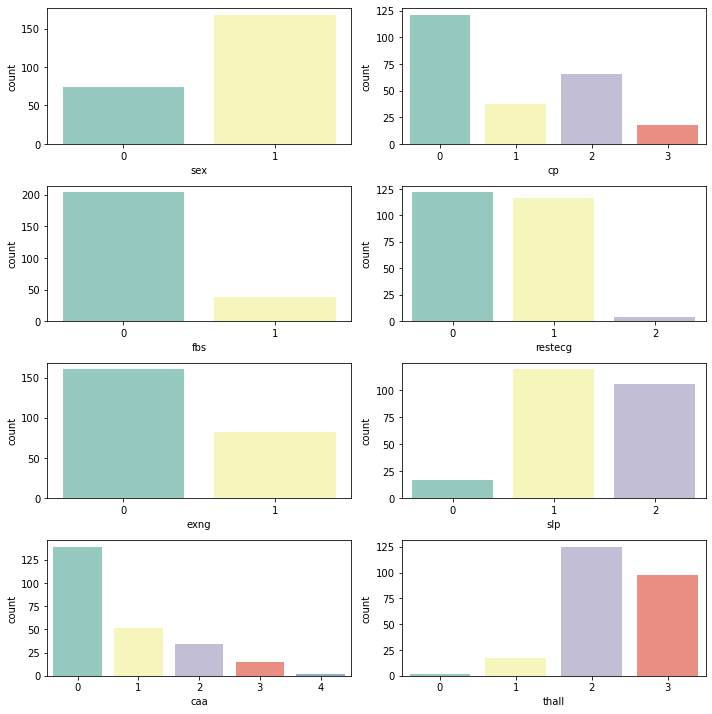

In [8]:
fig, axes =plt.subplots(4,2, figsize=(10,10))
axes = axes.flatten()

col_cat = data_x.select_dtypes('category').columns
object_bol = data_x.dtypes == 'category'
for ax, catplot in zip(axes, data_x.dtypes[object_bol].index):
    sns.countplot(x=catplot, ax=ax, data=data_x, palette='Set3')

plt.tight_layout()  
plt.show()

<AxesSubplot:xlabel='output', ylabel='count'>

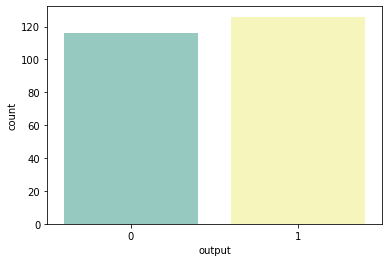

In [9]:
sns.countplot(data=data_y, x='output', palette='Set3')

In [10]:
def plot_box(data):
    return sns.boxplot(data=train, x='output', y=data, palette="Set3")

def plot_dis(data):
    return sns.displot(data=train, x=data, hue='output', kind="kde", fill=True)

def plot_bi(data1, data2):
    return sns.displot(data=train, x=data1, y=data2, hue='output', kind='kde')

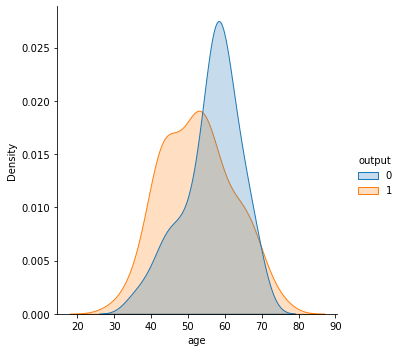

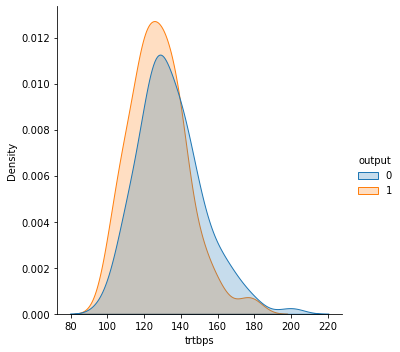

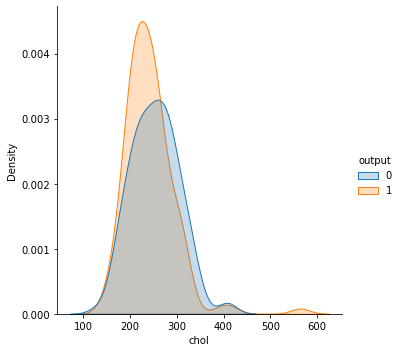

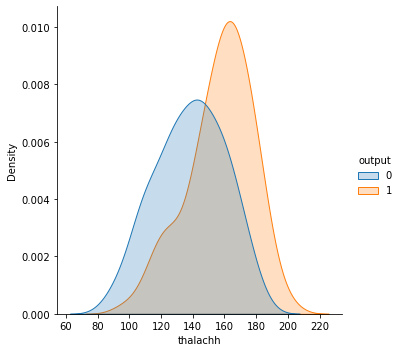

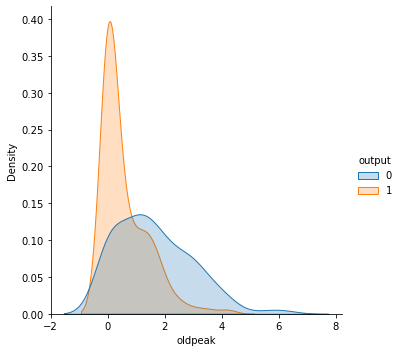

In [11]:
col_num = train.select_dtypes('number').columns
for col in col_num:
    plot_dis(col)

<AxesSubplot:xlabel='output', ylabel='age'>

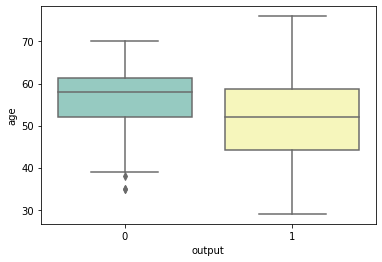

In [12]:
plot_box('age')

<AxesSubplot:xlabel='output', ylabel='trtbps'>

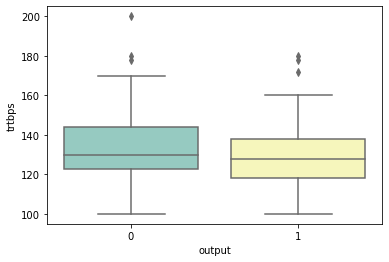

In [13]:
plot_box('trtbps')

<AxesSubplot:xlabel='output', ylabel='chol'>

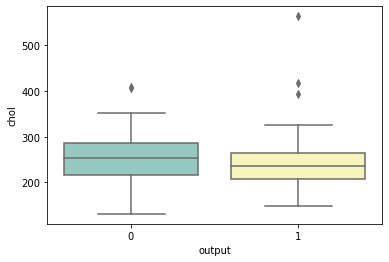

In [14]:
plot_box('chol')

<AxesSubplot:xlabel='output', ylabel='thalachh'>

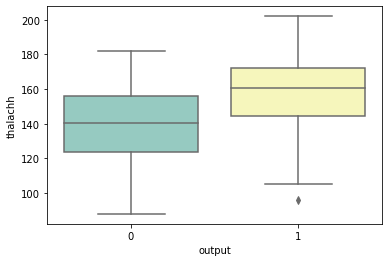

In [15]:
plot_box('thalachh')

<AxesSubplot:xlabel='output', ylabel='oldpeak'>

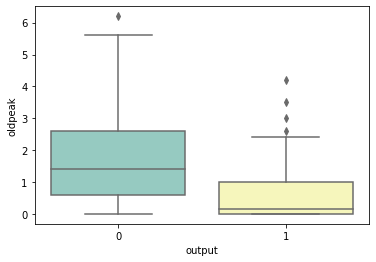

In [16]:
plot_box('oldpeak')

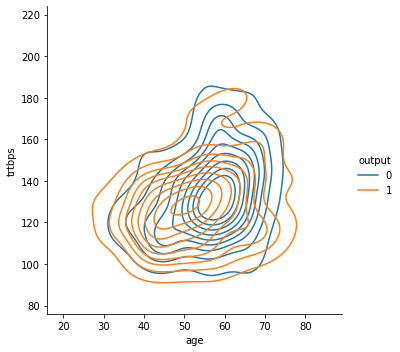

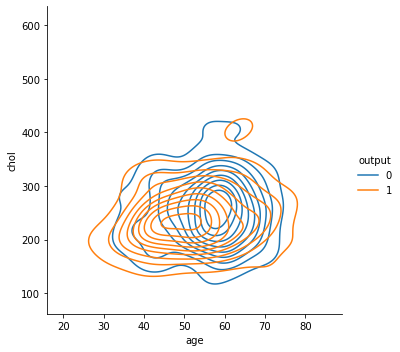

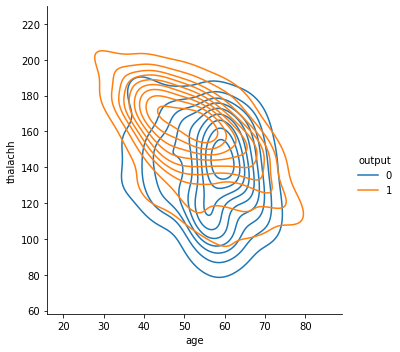

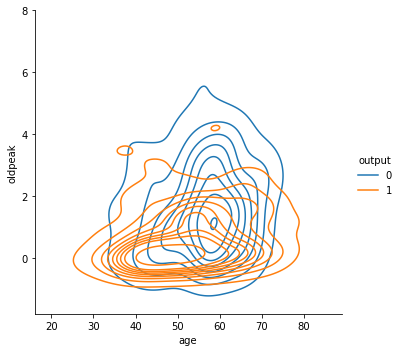

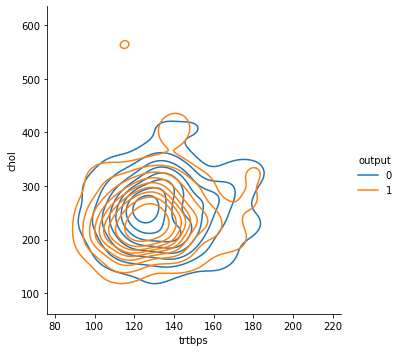

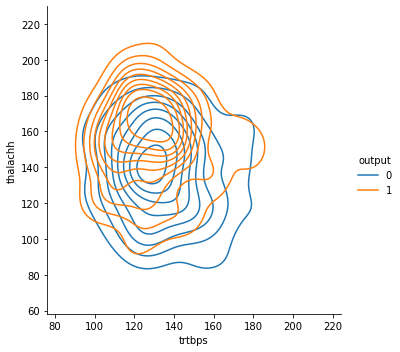

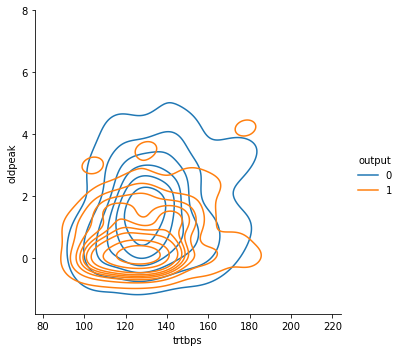

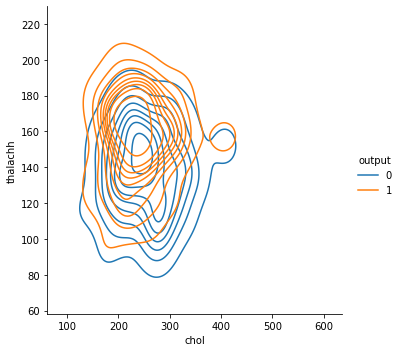

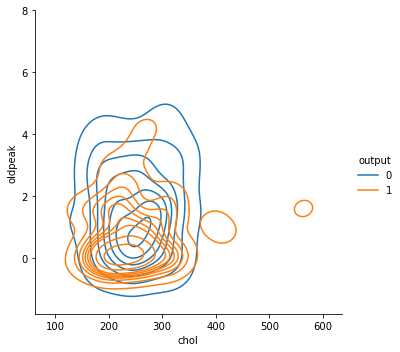

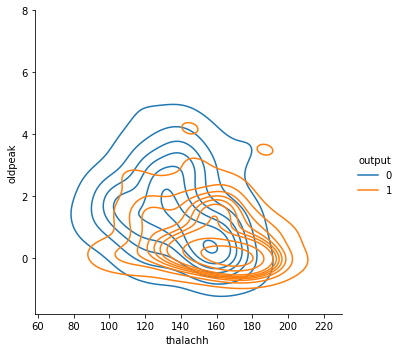

In [17]:
i = 0
for col1 in col_num[:len(col_num)-1]:
    for col2 in col_num[i+1:]:
        if col1 == col2:
            pass
        else:
            plot_bi(col1, col2)
    i+=1

/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3

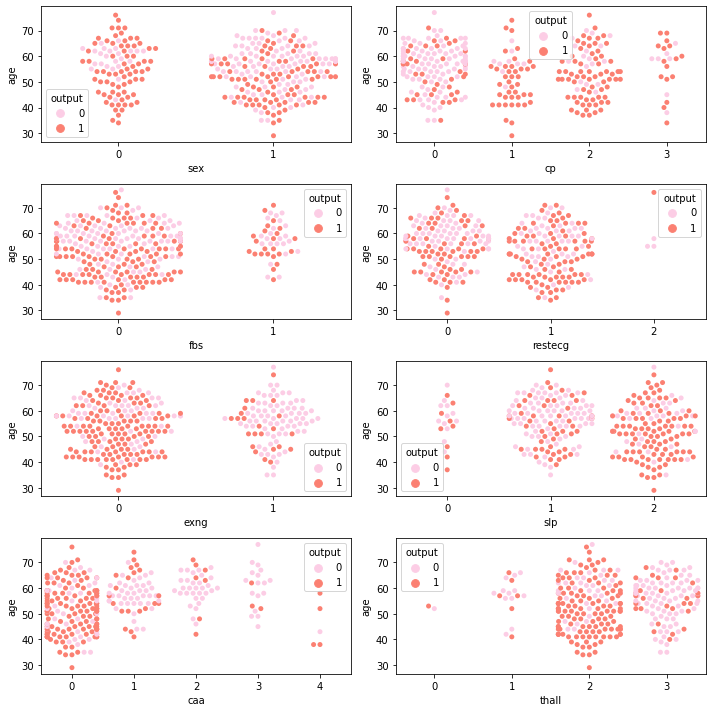

In [18]:
fig, axes =plt.subplots(4,2, figsize=(10,10))
axes = axes.flatten()

object_bol = data_x.dtypes == 'category'
for ax, catplot in zip(axes, data_x.dtypes[object_bol].index):
    sns.swarmplot(data=data, x=catplot, y='age', hue='output', palette='Set3_r', ax=ax)

plt.tight_layout()  
plt.show()

/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/pytho

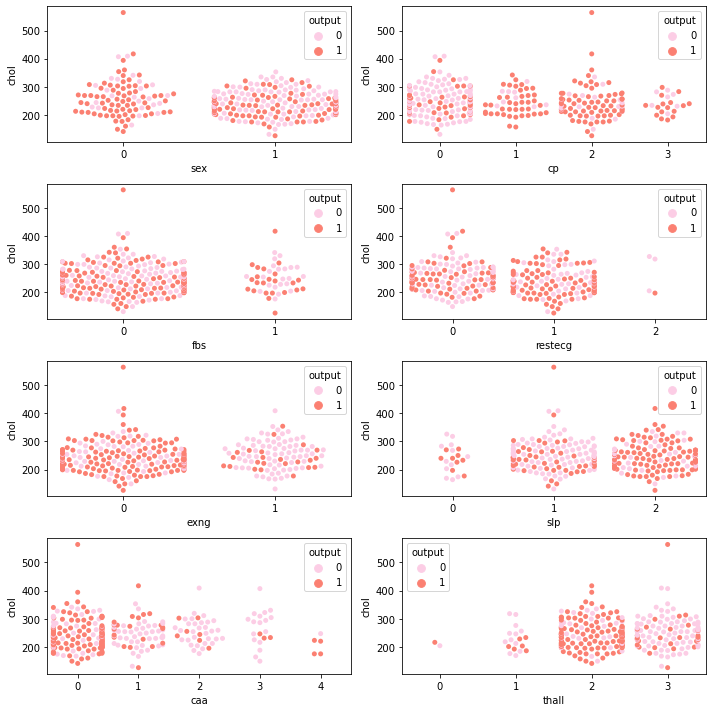

In [19]:
fig, axes = plt.subplots(4,2, figsize=(10,10))
axes = axes.flatten()

for ax, catplot in zip(axes, data_x.dtypes[object_bol].index):
    sns.swarmplot(data=data, x=catplot, y='chol', hue='output', palette='Set3_r', ax=ax)

plt.tight_layout()  
plt.show()

/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/pytho

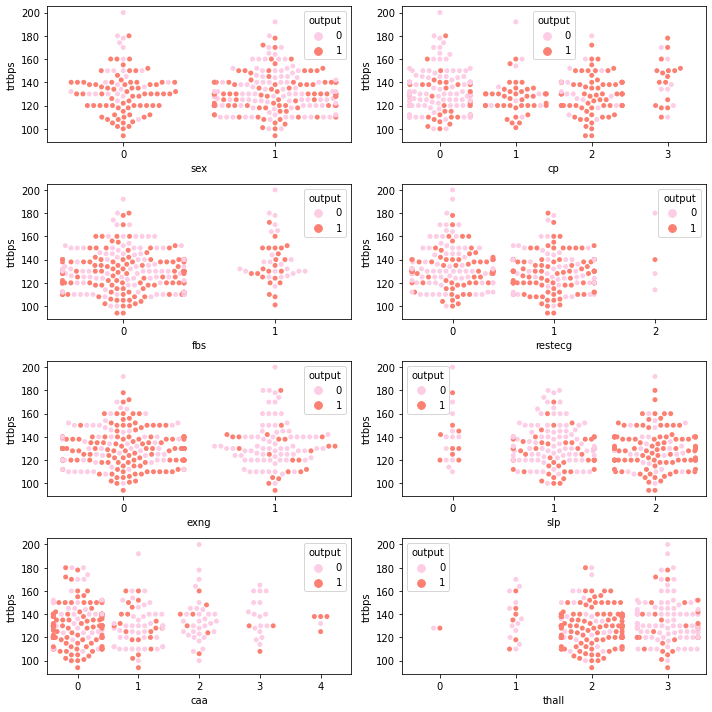

In [20]:
fig, axes = plt.subplots(4,2, figsize=(10,10))
axes = axes.flatten()

for ax, catplot in zip(axes, col_cat):
    sns.swarmplot(data=data, x=catplot, y='trtbps', hue='output', palette='Set3_r', ax=ax)

plt.tight_layout()  
plt.show()

/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/teerapong/opt/anaconda3/lib/python

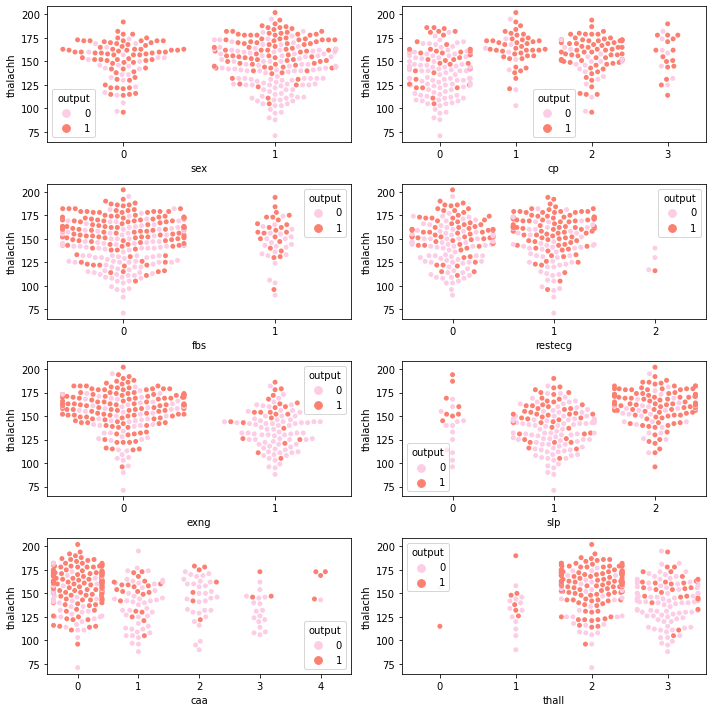

In [21]:
fig, axes = plt.subplots(4,2, figsize=(10,10))
axes = axes.flatten()

for ax, catplot in zip(axes, col_cat):
    sns.swarmplot(data=data, x=catplot, y='thalachh', hue='output', palette='Set3_r', ax=ax)

plt.tight_layout()  
plt.show()

In [23]:
ftwo_score = make_scorer(fbeta_score,beta=2)

In [24]:
numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())])
category_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
                        transformers=[
                            ('num', numeric_transformer, col_num),
                            ('cat', category_transformer, col_cat),
                        ]
)

model_cat = Pipeline(steps=[('preprocess',preprocessor),
                                ('model', CatBoostClassifier())
                                ])


parameters = {'model__depth'         : randint(3, 10),
              'model__learning_rate' : np.linspace(0.00001,0.01,10),
              'model__iterations'    : [1000],
              'model__min_child_samples' : randint(1,40),
              'model__l2_leaf_reg' : np.logspace(-4, 4, 20)
              }

In [23]:
# feature_cat = []
# for i in col_cat:
#     feature_cat.append(data_x.columns.get_loc(i))

In [25]:
cat = RandomizedSearchCV(model_cat, param_distributions = parameters, cv = 10, n_jobs=-1, n_iter=50, scoring=ftwo_score)
cat.fit(data_x, data_y)

0:	learn: 0.6931262	total: 59.4ms	remaining: 59.3s
1:	learn: 0.6931187	total: 62.1ms	remaining: 31s
2:	learn: 0.6931113	total: 63ms	remaining: 20.9s
3:	learn: 0.6931019	total: 63.9ms	remaining: 15.9s
4:	learn: 0.6930777	total: 69.3ms	remaining: 13.8s
5:	learn: 0.6930505	total: 75.5ms	remaining: 12.5s
6:	learn: 0.6930310	total: 80.8ms	remaining: 11.5s
7:	learn: 0.6930155	total: 84.1ms	remaining: 10.4s
8:	learn: 0.6929893	total: 89.9ms	remaining: 9.89s
9:	learn: 0.6929647	total: 95.6ms	remaining: 9.46s
10:	learn: 0.6929394	total: 101ms	remaining: 9.1s
11:	learn: 0.6929143	total: 107ms	remaining: 8.82s
12:	learn: 0.6929081	total: 108ms	remaining: 8.22s
13:	learn: 0.6928931	total: 114ms	remaining: 8.02s
14:	learn: 0.6928734	total: 120ms	remaining: 7.85s
15:	learn: 0.6928534	total: 125ms	remaining: 7.71s
16:	learn: 0.6928291	total: 131ms	remaining: 7.58s
17:	learn: 0.6928126	total: 137ms	remaining: 7.45s
18:	learn: 0.6927944	total: 142ms	remaining: 7.35s
19:	learn: 0.6927705	total: 148ms	re

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], dtype='object')),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], dtype='object'))])),
                                             ('mo...
       1.12883789e+01, 2

In [26]:
cat.best_score_

0.8598691337884269

In [27]:
# score = []
# for i in range(5):
#     score.append(grid.cv_results_['split{0}_test_score'.format(i)].mean())

In [28]:
model_lr = Pipeline(steps=[('preprocess',preprocessor),
                                ('model',LogisticRegression())
                                ])

parameters = {'model__penalty'   : ['l1', 'l2'], 
              'model__C'         : np.logspace(-4, 4, 20),
              }

lr = RandomizedSearchCV(model_lr, param_distributions = parameters, cv = 10, n_jobs=-1, n_iter=50, scoring=ftwo_score)
lr.fit(data_x, data_y)

/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.84426977        nan 0.84541012        nan 0.90263362
        nan 0.87574094        nan 0.86313526        nan 0.8417153
        nan 0.87058984        nan 0.86718909        nan 0.86563541
        nan 0.86427856        nan 0.85647319        nan 0.85654437
        nan 0.85629032        nan 0.85629032        nan 0.85700332
        nan 0.86273046        nan 0.85576325        nan 0.85576325
        nan 0.85576325        nan 0.85576325]
  warnings.warn(
/Users/teerapong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'], dtype='object')),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               Index(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], dtype='object'))])),
                                             ('mo...
                   param

In [29]:
lr.best_score_

0.9026336206664547

## Test set: Heart Attack

In [33]:
lr.score(test_x, test_y)

0.9330143540669856

In [34]:
lr_pred = lr.predict(test_x)
print(classification_report(test_y, lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        22
           1       0.74      1.00      0.85        39

    accuracy                           0.77        61
   macro avg       0.87      0.68      0.69        61
weighted avg       0.83      0.77      0.73        61



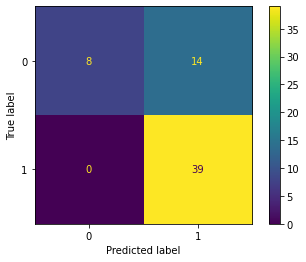

In [35]:
plot_confusion_matrix(lr, test_x, test_y)